# SEL635/SEL5724 - Visão Computacional Aplicada a Robótica



**Aluno:** Luiza Rodrigues Cardoso

**NUSP:** 14593332

Versão do documento: 1.1

# Lista 3 - Calibração de Câmera

O propósito deste exercício é implementar um dos métodos de calibração do livro Trucco e Verri (1998).

## Preparação do ambiente e definição de funções de exercícios anteriores

In [1]:
# Importar as bibliotecas que serão utilizadas
import numpy as np
import matplotlib.pyplot as plt
import math

Defina a seguir as funções implementadas em exercícios anteriores que serão utilizadas nessa Tarefa:

In [2]:
def proj_perspectiva(Pc,f):
  (M,N) = np.shape(Pc) # recupera o tamanho da matriz (N linhas, M colunas)
  if(M!=3):
    print('Aviso: a matriz Pc usada como entrada não possui três linhas!')

  pc = np.zeros((3,N))  # Inicializa o vetor pc de dimensão 3xN com zeros
  
  # Encontra a projeção perspectiva dos pontos no plano da imagem em [mm]:
  ######
  # Coloque aqui o seu código para calcular a matriz pc
  #Obtendo as coordenadas do sistema em relação ao mundo
  Xc = Pc[0,:]
  Yc = Pc[1,:]
  Zc = Pc[2,:]

 

  #aplicando o fator de correção q
  x = f*Xc/Zc
  y = f*Yc/Zc
      
  #matriz no sistema de coordenas da camera
  pc[0,:] = x
  pc[1,:] = y
  pc[2,:] = 1 #coordenada homogenea

  ######

  return pc





In [3]:
def camera_to_image(pc,sx,sy,ox,oy):
  (M,N) = np.shape(pc) # recupera o tamanho da matriz (N linhas, M colunas)
  if(M!=3):
    print('Aviso: a matriz pc usada como entrada não possui três linhas!')

  p_im = np.zeros((2,N))  # Inicializa o vetor p de dimensão 2xN com zeros

  # Converte as coordenadas dos pontos pc do sistema da câmera em [mm] para o sistema de coordenadas da imagem em [px]:
  #obtendo as coordenadas em relação ao sistema da camera
  x_im = pc[0,:]
  y_im = pc[1,:]
  
  #aplicando uma correção em relação à origem dos sistemas e passando da medida real(mm) para medidas discretas(pixel)
  x = ox - (x_im/sx)    
  y = oy - (y_im/sy)
      
  #matriz de coordenadas no sistema da imagem(x,y) em pixels
  p_im[0,:] = x
  p_im[1,:] = y 
    
  
  ######

  return p_im

In [4]:
def calibration_pattern(n,d):
    Pw = np.zeros((3,3*n*n+7))
    Pw[:,0] = [0, 0, 0]
    Pw[:,1] = [n*d, 0, 0]
    Pw[:,2] = [0, n*d, 0]
    Pw[:,3]=[0, 0, n*d];
    Pw[:,4]=[n*d, n*d, 0];
    Pw[:,5]=[n*d, 0, n*d];
    Pw[:,6]=[0, n*d, n*d];

    for i in range(n):
        for j in range(n):
            Pw[:,n*i+j+7]= [d*j, d*i, 0]
            Pw[:,n*n + n*i+j+7]= [0, d*j, d*i];
            Pw[:,2*n*n + n*i+j+7]= [d*i, 0, d*j];

    return Pw

In [5]:
def Rx(theta):
    theta = np.radians(theta)
    R = np.array([[1, 0, 0], [0, np.cos(theta), -np.sin(theta)], [0, np.sin(theta), np.cos(theta)]])
    return R
def Ry(theta):
    theta = np.radians(theta)
    R = np.array([[np.cos(theta), 0, np.sin(theta)], [0, 1, 0], [-np.sin(theta), 0, np.cos(theta)]])
    return R
def Rz(theta):
    theta = np.radians(theta)
    R = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
    return R
def Homogenea(R,t):
    t = t.reshape(-1, 1) #vetor de translação (formato de vetor coluna)
    H = np.concatenate((R,t),axis=1) #concatena na horizontal a matriz de rotação e vetor de translação
    temp_v = np.array([0,0,0,1]).reshape(1, -1) #ultima linha da matriz homogênia (formato de vetor linha)
    H = np.concatenate((H,temp_v),axis=0) #concatena na vertical a ultima linha da matriz de homografia
    return H

In [6]:
def world_to_camera(Pw,Rwc,Twc):
    (M,N) = np.shape(Pw) # recupera o tamanho da matriz (M linhas, N colunas)

    # Coloque seu codigo aqui
    Pc = Rwc.T @ (Pw - Twc)

    return Pc


In [7]:
def world_to_image(Pw,Rwc,Twc,f,sx,sy,ox,oy):

    # Coloque seu codigo aqui
    #passando as coord do mundo para a camera
    Pc = world_to_camera(Pw, Rwc, Twc)
    
    #aplicando projeção prespectiva
    pc = proj_perspectiva(Pc, f)

    #passando as coord da camera para a imagem
    p_im = camera_to_image(pc, sx, sy, ox, oy)

    return p_im


In [8]:
def plot_image(p_im,size_x,size_y):
    plt.figure()
    plt.plot(p_im[0,4:],p_im[1,4:],'bo',mfc='none')
    plt.plot(p_im[0,0],p_im[1,0],'ko',mfc='none')
    plt.plot(p_im[0,1],p_im[1,1],'co',mfc='none')
    plt.plot(p_im[0,2],p_im[1,2],'ro',mfc='none')
    plt.plot(p_im[0,3],p_im[1,3],'go',mfc='none')
    plt.axis([0, size_x, size_y, 0])

## Parte A: Imagens do Padrão de Calibração

Considere as duas câmeras e o padrão de calibração definidos e posicinados de acordo com as instruções da Tarefa 2.

Coloque a seguir a sequência de código utilizada ao final da Tarefa 2 para obter a imagem da câmera 1 e da câmera 2 do padrão de calibração.

In [9]:
#Matrizes de rotação
#todas rotação são em relação ao sistema de coordenadas da camera/eixos atuais
r11 = Rz(20) #rotação de 20° em relação ao eixo z
r12 = Ry(-140) #rotação de -140° em relação ao eixo y
r13 = Rx(25) #rotação de 25° em relação ao eixo x

#matriz geral de rotação
Rwc1 = r11@r12@r13 

## Insira seu codigo aqui para calcular e mostrar a matriz de rotação da câmera 2 em relação ao sistema de coordenadas do mundo
#rotações em relação ao eixo da camera e do mundo/ rotações mistas
r21 = Rx(5) #rotação em relação ao eixo x, em relação a camera
r22 = Ry(-120) #rotação em relação ao eixo y, em relação ao mundo
r23 = Rz(35) #rotação em relação ao eixo z, em relação ao mundo

#No enunciado diz que as rotações em Z e y ocorrem em relação ao mundo e a rotação em X em relação a camera
#Assim, foi necessário aplicar as rotação relacionadas ao mundo antes dos eixos atuais
Rwc2 = r23 @ r22 @r21 

Parametros Intrísecos da camera 1:
f: 12, sx: 0.01, sy: 0.01, ox: 800, oy: 600, alpha = 0
Parametros Extrísecos da camera 1:
Matriz de rotação(world->camera): 
[[-0.71984631 -0.56524657 -0.40288658]
 [-0.26200263  0.75873967 -0.59637969]
 [ 0.64278761 -0.32374437 -0.69427204]]
vetor translação da camera1: 
[[1600]
 [1800]
 [1700]]
p_im1 =  [[ 580.30924478  890.99327337  659.97269703  161.147924   1085.12209782
   497.82829469]
 [ 563.13981745  828.99888456  158.06751211  727.78910845  421.4805493
  1132.95125045]]
Parametros Intrísecos da camera 1:
f: 12, sx: 0.01, sy: 0.01, ox: 800, oy: 600, alpha = 0
Parametros Extrísecos da camera 1:
Matriz de rotação(world->camera): 
[[-0.40957602 -0.63322265 -0.65671649]
 [-0.28678822  0.7727419  -0.56623536]
 [ 0.8660254  -0.04357787 -0.49809735]]
vetor translação da camera1: 
[[1700]
 [1500]
 [1600]]
p_im2 =  [[ 912.57533459 1181.05516852 1098.27603088  478.43941228 1544.68802215
   652.77539125]
 [ 605.60739093  968.16479952  184.88407634  629.

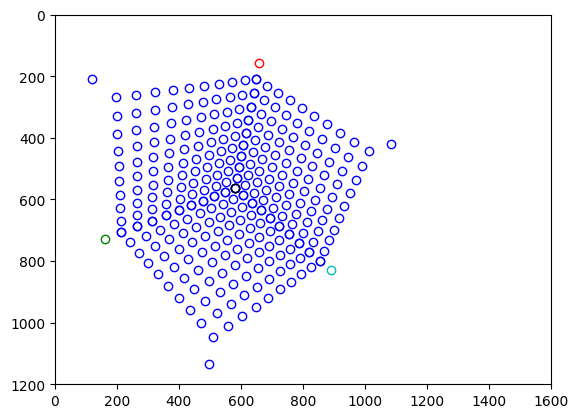

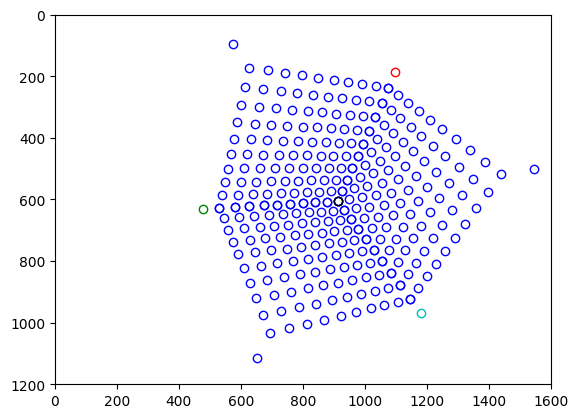

In [10]:
## Coloque seu código aqui para fazer cada um dos passos a seguir

# Definir o padrão de calibração:
Pw = calibration_pattern(n=10,d=100) # pontos do padrão de calibração
#dados
f = 12
sx = sy = 0.01
ox = 800
oy = 600

# Definir a câmera 1:
#vetor posição
Tw_c1 = np.array([[1600], [1800], [1700]])
#a imagem obtida pela câmera 1
p_im1 = world_to_image(Pw, Rwc1, Tw_c1, f, sx, sy, ox, oy)

# TODO: Faça um print dos parâmetros intrínsecos e extrínsecos da camera 1
print("Parametros Intrísecos da camera 1:")
print(f"f: {f}, sx: {sx}, sy: {sy}, ox: {ox}, oy: {oy}, alpha = 0")
print("Parametros Extrísecos da camera 1:")
print(f"Matriz de rotação(world->camera): \n{Rwc1}")
print(f"vetor translação da camera1: \n{Tw_c1}")

# Obter a imagem do padrão de calibração a partir da câmera 1:
plot_image(p_im1,size_x=1600,size_y=1200)
print('p_im1 = ',p_im1[:,0:6])

# Definir a câmera 2:
#posição da camera 2
Tw_c2 = np.array([[1700], [1500], [1600]])

#a imagem obtida pela câmera 2
p_im2 = world_to_image(Pw, Rwc2, Tw_c2, f, sx, sy, ox, oy)

# TODO: Faça um print dos parâmetros intrínsecos e extrínsecos da camera 2
print("Parametros Intrísecos da camera 1:")
print(f"f: {f}, sx: {sx}, sy: {sy}, ox: {ox}, oy: {oy}, alpha = 0")
print("Parametros Extrísecos da camera 1:")
print(f"Matriz de rotação(world->camera): \n{Rwc2}")
print(f"vetor translação da camera1: \n{Tw_c2}")

# Obter a imagem do padrão de calibração a partir da câmera 2:
p_im2 = world_to_image(Pw, Rwc2, Tw_c2, f, sx, sy, ox, oy)
plot_image(p_im2,size_x=1600,size_y=1200)
print('p_im2 = ',p_im2[:,0:6])





## Parte B: Calibração de Câmeras

1. Implemente a função `Rwc,Twc,fx,fy,ox,oy = calibrate_camera(Pw,p_im)` utilizando um dos métodos de calibração de câmera apresentado em aula. A entrada da função deve ser uma matriz $P_w$ de dimensão $3\times N$ que são as coordenadas dos pontos do padrão de calibração descritas no sistema de coordenadas do mundo, $\{W\}$, e uma matriz $p_{im}$ de dimensão $2\times N$ que são as coordenadas da imagem em pixels correspondentes a cada um dos pontos do padrão de calibração. A função deve retornar os seguintes parâmetros na ordem: ${^wR_c}$ a orientação da câmera em relação ao sistema de coordenadas do mundo; $^wT_c$ a posição do centro óptico da câmera em relação ao sistema de coordenadas do mundo em [m]; $f_x$ e $f_y$ a distância focal em $[mm/pixel]$; $o_x$ e $o_y$ a posição na imagem da projeção do centro óptico dada em $[pixel]$.

In [11]:
def calibrate_camera(Pw,p_im):
  (M,N) = np.shape(Pw)
    #montamdo a matriz A
  A = np.zeros((2*N, 12))

  #obtendo os vetores relacionadas as posições x,y,z no mundo e imagem
  Xw = Pw[0,:]
  Yw = Pw[1,:]
  Zw = Pw[2,:]

  Xim = p_im[0,:]
  Yim = p_im[1,:]
  
  #definindo A
  for i in range(N):
    
    X1 = Xw[i]
    Y1 = Yw[i]
    Z1 = Zw[i]
    x1 = Xim[i]
    y1 = Yim[i]
    #indice par - linha x
    k_x = 2*i
    #Indice impar - linha y
    k_y =  k_x+1
    
    A[k_x,:] = [ X1, Y1, Z1, 1, 0, 0, 0, 0, -x1*X1, -x1*Y1, -x1*Z1,-x1]
    A[k_y, :] = [ 0, 0, 0, 0,X1, Y1, Z1, 1, -y1*X1, -y1*Y1, -y1*Z1, -y1]
    
  #uso da biblio numpy pra calcular o SVD
  #retorno sao as matrizes U, S, Vh.T onde m será a coluna de Vt que contem os menores valores, i.e., a ultima linha
  U, S, Vt = np.linalg.svd(A, full_matrices=True, compute_uv=True, hermitian=False)
    
  m = Vt[-1,:] #matriz 4x3
  m_estim = m.reshape((3,4))
  #print("Matriz estimada: \n", m_estim)
  
  #calculo dos paramteros a partir dos vetores qi(3x1) que são os 3 primeiros elem da matriz estimada
  q1 = m_estim[0,0:3] # [m11, m12, m13]t
  q2 = m_estim[1,0:3] #[m21, m22, m23]t
  q3 = m_estim[2,0:3]# [m31, m32, m33]t
  q4 = m_estim[:,3] #[m14, m24, m34]t

  #normalizando os elems - fator de escala gama
  gama = np.linalg.norm(q3)
  
  q1_norm = q1 / gama
  q2_norm = q2 / gama
  q3_norm =  q3 / gama
  q4_norm  =  q4 / gama

  #centro optico
  ox = q1_norm.T @ q3_norm
  oy = q2_norm.T @ q3_norm

  #fatores extrinsecos
  #distancia focal
  
  fx = np.sqrt(max(0, (q1_norm.T@q1_norm) - (ox**2)))
  fy = np.sqrt(max(0,(q2_norm.T@q2_norm) - (oy**2)))
  
  #problema quando fy ou fx são muito pequenos
  if fx < 1e-6: fx = 1e-6
  if fy < 1e-6: fy = 1e-6

  Tz = q4_norm[2] # se positivo, em frente a camera,cc: atras dela
  if Tz >= 0:
    sigma = 1
  else:
    sigma = -1

  #calculando as linhas da matriz de rotação
  r1_i = sigma * (ox*q3_norm - q1_norm)/fx
  r2_i = sigma *( oy*q3_norm - q2_norm)/fy
  r3_i = sigma * q3_norm

  #matriz de translação
  Tx = (ox*Tz - q4_norm[0])/fx
  Ty = (oy*Tz - q4_norm[1])/fy

  #definindo a matriz de rotação
  R = np.vstack((r1_i, r2_i, r3_i)) #stack vertical

  # a matriz precisa ser ortonormal
  Ur, Dr, Vtr = np.linalg.svd(R)
  Rwc = (Ur @ Vtr)

  #analisando o det
  det =  np.linalg.det(Rwc)
  if det <0:
    Ur[:,2] = -Ur[:,2] #inverte o sinal pro det >0
    Rwc = (Ur @ Vtr)
    
  #definindo a translação
  Twc = np.vstack((Tx, Ty, Tz)).reshape(3,1)

  #verificando a posição dos pontos em relação a camera
  ponto1 = Pw[:, 0:1]
  Pcteste = Rwc @ ponto1 + Twc
  print("PONTO1",Pcteste)
  if Pcteste[2,0] < 0:# se a cordenada z for negativa
    Twc = -Twc #espelha a posição pro eixo positivo
    
  #Passando as coord camera-mundo
  Rcw = Rwc.T
  Tcw = -Rwc.T@Twc
  return Rcw,Tcw,fx,fy,ox,oy

2. Faça um script para testar a calibração para a câmera 1.

In [12]:
#Padrão de calibração
Pw = calibration_pattern(n=10, d=100)
f =12
sy = sy = 0.01
ox = 800
oy = 600

#A camera 1 possui as seguintes rotações
r11 = Rz(20) #rotação de 20° em relação ao eixo z
r12 = Ry(-140) #rotação de -140° em relação ao eixo y
r13 = Rx(25) #rotação de 25° em relação ao eixo x

#matriz geral de rotação
Rwc1 = r11@r12@r13 
print('Rwc1 =\n',Rwc1)

#E sua posição é dado por:
zeros = np.zeros((1,3))
one = np.ones((1,1))
Tw_c1 = np.array([[1600], [1800], [1700]])
print('Twc1 =\n',Tw_c1)
#Assim, temos que P_im será:
p_im1= world_to_image(Pw,Rwc1, Tw_c1, f, sx, sy, ox, oy)
#print('p_im1 = ',p_im1[:,0:6])

print("Valores Encontrados")
#Obtendo os parametros extrinsecos 
Rwc_est,Twc_est,fx_est,fy_est,ox_est,oy_est = calibrate_camera(Pw, p_im1)
print('A matriz de Rotação: \n', Rwc_est)
print('A matriz posição: \n', Twc_est)
print(f'Distancias focais: fx={fx_est} e fy={fy_est} em pixels e\n em mm fx={fx_est*sx} e fy={fy_est*sy}')
print(f'Distancia dos centros opticos: ox={ox_est} e oy={oy_est}')


Rwc1 =
 [[-0.71984631 -0.56524657 -0.40288658]
 [-0.26200263  0.75873967 -0.59637969]
 [ 0.64278761 -0.32374437 -0.69427204]]
Twc1 =
 [[1600]
 [1800]
 [1700]]
Valores Encontrados
PONTO1 [[ -530.61989421]
 [  -89.02853482]
 [-2898.36444277]]
A matriz de Rotação: 
 [[-0.71984631 -0.56524657 -0.40288658]
 [-0.26200263  0.75873967 -0.59637968]
 [ 0.64278761 -0.32374437 -0.69427204]]
A matriz posição: 
 [[1599.9999996 ]
 [1799.9999995 ]
 [1699.99999951]]
Distancias focais: fx=1199.999999540286 e fy=1199.9999996801494 em pixels e
 em mm fx=11.99999999540286 e fy=11.999999996801494
Distancia dos centros opticos: ox=799.999999822561 e oy=599.9999997534374


3. Faça um script para comparar os parâmetros obtidos através do método de calibração implementado com os parâmetros conhecidos das câmeras. Ou seja, apresente o erro entre os parâmetros `Rwc,Twc,fx,fy,ox,oy` conhecidos e os estimados para a câmera 1

In [13]:
#Utilizando o RMSE para calcular a semelhanças dos parametros encontrados
def rmse(referencia, estimado):
    if (isinstance(referencia,int) and isinstance(estimado, int)) or (isinstance(referencia,float) and isinstance(estimado, float)) or (isinstance(referencia,int) and isinstance(estimado, float)):
        dim_ref =1
        dim_estimado=1
    else:
        dim_ref = referencia.shape[0]
        dim_estimado = estimado.shape[0]

    
    
    rmse = np.sqrt(np.sum((estimado - referencia) ** 2) / (dim_ref * dim_estimado))
    
    print('O erro entre o valor original e o valor estimado foi de {:.6f}'.format(rmse))


In [14]:
print("Erro quadratico medio entre as matriz de Rotação:")
erro_rotacao = rmse(Rwc1, Rwc_est)

print("\nErro quadratico medio entre as matriz de Translação:")
erro_rotacao = rmse(Tw_c1, Twc_est)

print("\nErro quadratico medio entre as distancia focal no eixo X[mm]:")
erro_rotacao = rmse(f, fx_est*sx)
print(f-(fx_est*sx)) #a dimensao da diff nos permite dizer que são semelhantes

print("\nErro quadratico medio entre as distancia focal no eixo Y[mm]:")
erro_rotacao = rmse(f, fy_est*sy)
print(f-(fy_est*sy))

print("\nErro quadratico medio entre os eixos opticos no eixo X[pixels]:")
erro_rotacao = rmse(ox, ox_est)
print(ox-(ox_est)) #a dimensao da diff nos permite dizer que são semelhantes

print("\nErro quadratico medio entre os eixos opticos no eixo Y[pixelss]:")
erro_rotacao = rmse(oy, oy_est)
print(oy-(oy_est))

Erro quadratico medio entre as matriz de Rotação:
O erro entre o valor original e o valor estimado foi de 0.000000

Erro quadratico medio entre as matriz de Translação:
O erro entre o valor original e o valor estimado foi de 0.000000

Erro quadratico medio entre as distancia focal no eixo X[mm]:
O erro entre o valor original e o valor estimado foi de 0.000000
4.597140446094272e-09

Erro quadratico medio entre as distancia focal no eixo Y[mm]:
O erro entre o valor original e o valor estimado foi de 0.000000
3.1985063486672516e-09

Erro quadratico medio entre os eixos opticos no eixo X[pixels]:
O erro entre o valor original e o valor estimado foi de 0.000000
1.7743900571076665e-07

Erro quadratico medio entre os eixos opticos no eixo Y[pixelss]:
O erro entre o valor original e o valor estimado foi de 0.000000
2.465626494085882e-07


3. Faça um script para testar a calibração para a câmera 2.

In [15]:
r21 = Rx(5) #rotação em relação ao eixo x, em relação a camera
r22 = Ry(-120) #rotação em relação ao eixo y, em relação ao mundo
r23 = Rz(35) #rotação em relação ao eixo z, em relação ao mundo

#No enunciado diz que as rotações em Z e y ocorrem em relação ao mundo e a rotação em X em relação a camera
#Assim, foi necessário aplicar as rotação relacionadas ao mundo antes dos eixos atuais
Rwc2 = r23 @ r22 @r21 
print('Rwc2 =\n',Rwc2)

Tw_c2 = (np.array([[1700,1500,1600]])).reshape(3,1)
print('Twc2 =\n',Tw_c2)

#Assim, temos que P_im será:
p_im2= world_to_image(Pw,Rwc2, Tw_c2, f, sx, sy, ox, oy)
#print('p_im1 = ',p_im1[:,0:6])

print("Valores Encontrados")
#Obtendo os parametros extrinsecos 
Rwc_est2,Twc_est2,fx_est2,fy_est2,ox_est2,oy_est2 = calibrate_camera(Pw, p_im2)
print('A matriz de Rotação: \n', Rwc_est2)
print('A matriz posição: \n', Twc_est2)
print(f'Distancias focais: fx={fx_est2} e fy={fy_est2} em pixels e\n em mm fx={fx_est*sx} e fy={fy_est*sy}')
print(f'Distancia dos centros opticos: ox={ox_est2} e oy={oy_est2}')




Rwc2 =
 [[-0.40957602 -0.63322265 -0.65671649]
 [-0.28678822  0.7727419  -0.56623536]
 [ 0.8660254  -0.04357787 -0.49809735]]
Twc2 =
 [[1700]
 [1500]
 [1600]]
Valores Encontrados
PONTO1 [[-259.17908063]
 [ -12.90974113]
 [2762.72683073]]
A matriz de Rotação: 
 [[-0.40957602 -0.63322265 -0.65671649]
 [-0.28678822  0.7727419  -0.56623536]
 [ 0.8660254  -0.04357787 -0.49809735]]
A matriz posição: 
 [[1699.99999974]
 [1499.99999976]
 [1600.00000003]]
Distancias focais: fx=1199.999999667741 e fy=1199.999999952514 em pixels e
 em mm fx=11.99999999540286 e fy=11.999999996801494
Distancia dos centros opticos: ox=800.0000002468554 e oy=599.9999999977014


4. Faça um script para comparar os parâmetros obtidos através do método de calibração implementado com os parâmetros conhecidos das câmeras. Ou seja, apresente o erro entre os parâmetros `Rwc,Twc,fx,fy,ox,oy` conhecidos e os estimados para a câmera 2.

In [16]:
print("Erro quadratico medio entre as matriz de Rotação:")
erro_rotacao = rmse(Rwc2, Rwc_est2)

print("\nErro quadratico medio entre as matriz de Translação:")
erro_rotacao = rmse(Tw_c2, Twc_est2)

print("\nErro quadratico medio entre as distancia focal no eixo X[mm]:")
erro_rotacao = rmse(f, fx_est2*sx)
print(f-(fx_est2*sx)) #a dimensao da diff nos permite dizer que são semelhantes

print("\nErro quadratico medio entre as distancia focal no eixo Y[mm]:")
erro_rotacao = rmse(f, fy_est2*sy)
print(f-(fy_est2*sy))

print("\nErro quadratico medio entre os eixos opticos no eixo X[pixels]:")
erro_rotacao = rmse(ox, ox_est2)
print(ox-(ox_est2)) #a dimensao da diff nos permite dizer que são semelhantes

print("\nErro quadratico medio entre os eixos opticos no eixo Y[pixelss]:")
erro_rotacao = rmse(oy, oy_est2)
print(oy-(oy_est2))

Erro quadratico medio entre as matriz de Rotação:
O erro entre o valor original e o valor estimado foi de 0.000000

Erro quadratico medio entre as matriz de Translação:
O erro entre o valor original e o valor estimado foi de 0.000000

Erro quadratico medio entre as distancia focal no eixo X[mm]:
O erro entre o valor original e o valor estimado foi de 0.000000
3.3225902029698773e-09

Erro quadratico medio entre as distancia focal no eixo Y[mm]:
O erro entre o valor original e o valor estimado foi de 0.000000
4.748610393789932e-10

Erro quadratico medio entre os eixos opticos no eixo X[pixels]:
O erro entre o valor original e o valor estimado foi de 0.000000
-2.4685539301572135e-07

Erro quadratico medio entre os eixos opticos no eixo Y[pixelss]:
O erro entre o valor original e o valor estimado foi de 0.000000
2.2986341718933545e-09


### Imagens esperadas do Padrão de Calibração

A Figura 1 e 2 mostram as imagens do padrão de calibração esperadas para a câmera 1 e 2 respectivamente.


<div>
<img src='https://drive.google.com/uc?id=15N_OAMHxABu1OYHaJ8puM-NosodEKoKw' width="500"/>
</div>
Figura 1 - Imagem do padrão de calibração obtida pela câmera 1


<div>
<img src='https://drive.google.com/uc?id=1N_bHV5sYUH2W3VXgDLSSOs0ILKOqcqz2' width="500"/>
</div>
Figura 2 - Imagem do padrão de calibração obtida pela câmera 2
